# ChessVision Tests

In [10]:
import chessvision as cv
import cv_globals
from util import listdir_nohidden
import cv2
import numpy as np
import test
import os

In [2]:
from u_net import load_extractor
from square_classifier import load_classifier

classifier = load_classifier()
extractor = load_extractor()

Loading square model..
Loading square model.. DONE
Loading board extraction model..
Loading board extraction model.. DONE


In [44]:
test_data_gen = test.get_test_generator()

In [3]:
N = sum([1 for _ in test_data_gen])

In [4]:
N

13

In [15]:
n = next(test_data_gen)

In [16]:
imgs = [n]

In [17]:
test_data_dir = os.path.join(cv_globals.CVROOT, "data/test")

In [25]:

#use this one to rough-label new test images
for filename, board_img in imgs:
    
    outfile = os.path.join(test_data_dir, "test_class", filename[:-4] + ".txt")
    
    if os.path.exists(outfile):
        continue
    #board_img, mask, predictions, chessboard, FEN, squares, names
    _, _, predictions, chessboard, _, _, _ = cv.classify_raw(board_img, filename, extractor, classifier)
    res = vectorize_chessboard(chessboard)
    
    with open(outfile, "w") as out:
        out.write(str(res))

Processing image f29c1937-8279-45a5-a74a-0c6b1aa3ffbe.JPG


In [26]:
print(chessboard)
print(res)

N N N N N N N N
N N N N N N N N
N N N N N N N N
N N N N N N N N
N N N N N N N N
N N N N N N N N
N N N N N N N N
N N N N N N N N
['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [39]:
import ast
# use this one to compute test-accuracy
test_accuracy = 0
for i in range(N):
    filename = filenames[i]
    truth_file = test_data_dir + "ground_truth/" + filename[:-4] + ".txt"
    with open(truth_file) as truth:
        true_labels = ast.literal_eval(truth.read())

    _, _, chessboard, _, _ = cv.classify_raw(test_imgs[i], filename, extractor, classifier)
    res = vectorize_chessboard(chessboard)
    test_accuracy += sim(res, true_labels)
    
test_accuracy /= N
test_accuracy *= 100

NameError: name 'filenames' is not defined

In [6]:
print("Test accuracy is {}%".format(test_accuracy))

NameError: name 'test_accuracy' is not defined

In [36]:
res = vectorize_chessboard(chessboard)
print(res)

['f', 'f', 'f', 'f', 'f', 'R', 'f', 'K', 'P', 'P', 'f', 'f', 'f', 'f', 'P', 'P', 'f', 'f', 'P', 'R', 'f', 'Q', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'p', 'f', 'f', 'f', 'f', 'f', 'f', 'p', 'q', 'f', 'f', 'b', 'f', 'f', 'N', 'f', 'f', 'p', 'f', 'f', 'p', 'r', 'p', 'f', 'f', 'f', 'f', 'r', 'k', 'f', 'f']


In [24]:
def sim(a, b):
    return sum([aa == bb for aa, bb in zip(a, b)]) / len(a)

def vectorize_chessboard1(board):
    res = ["f"] * 64
    
    piecemap = board.piece_map()
    
    for piece in piecemap:
        res[piece] = piecemap[piece].symbol()
        #print(piece)

    return res
        

In [33]:
def vectorize_chessboard(board):
    res = ""
    
    piecemap = board.piece_map()
    
    for piece in piecemap:
        res += piecemap[piece].symbol()
        #print(piece)

    return res

def modernize_chessboard(old):
    res = ""
    for o in old:
        res += o
    return res
    

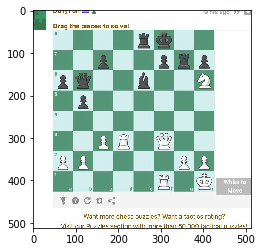

In [27]:
import matplotlib.pyplot as plt

plt.imshow(board_img)

In [39]:
# Translate from old to new

s = vectorize_chessboard(chessboard)
print(s)

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


In [45]:
import ast 
for filename, _ in test_data_gen:
    
    oldfile = os.path.join(test_data_dir, "ground_truth", filename[:-4] + ".txt")
    newfile = os.path.join(test_data_dir, "new_truth", filename[:-4] + ".txt")
    if not os.path.exists(oldfile):
        continue
    
    with open(oldfile) as truth:
        old_labels = ast.literal_eval(truth.read())
        modern = modernize_chessboard(old_labels)
        print(modern)
    with open(newfile, "w") as new:
        new.write(modern)

fffffRfKPPffffPPffPRfQfffffffffffpffffffpqffbffNffpffprpffffrkff
fkrfffnrpbppffppfpfffffffffffffffbBfNffffffPfffPfqPBffPfPffKQffR
ffRRffKffPfffPBPffNfffPfPfQPffNfpffnPfffffpfpffpfpqbbppffffrfrkf
RfBQRfKfffPNfPPfPffPfNfPfPffPfbfffpfpfffffpffnpfppqffpbprffffrkf
fffRRfKfPffffPBfqfPfBfPffffffffQfpfffbpfffpfffkfpfffbffprnfffrff
fffBffffPffffKNffPfffPPffbfPfBfPfnfpfffpffffffffppfffppfffbfffkf
RNBQKBNRPPPPPPPPffffffffffffffffffffffffffffffffpppppppprnbqkbnr
ffffffffPfKfRffffPfPffrPfffbPfNpffpfffffkppfffffpfffffffffffffff
RNBQKBNRPPPPPPPPffffffffffffffffffffffffffffffffpppppppprnbqkbnr
fRfQffKfPbfffPPffffffNfPffnffffffpfffffNpfffffffrffRffppfqfffrkf
RNBQKBNRPPPPPPPPffffffffffffffffffffffffffffffffpppppppprnbqkbnr
RffQKBfRPPPffPPffNNfBffPffffPfffffffpfffpffpbnfffpfffppprnfqkbfr
fffffffffffffffffffffffffffffffffffffffffRfRffffrfqfffffffkfKfff


In [41]:
print(modern)
print(s)
print(sim(modern, s))

fffffRfKPPffffPPffPRfQfffffffffffpffffffpqffbffNffpffprpffffrkff
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
0.015625
